# Chapter 3 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [11]:
import random
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt
import mistat

# Statistical Inference and Bootstrapping

## Sampling Characteristics of Estimators

[53.23580201 54.55188863 50.83037769 52.85512631 51.08667143 49.95751596
 49.07410117 49.32174484 51.10553037 51.68742238 52.61024847 49.46879754
 48.14447173 50.13280472 48.33310784 49.3949364  53.13713367 52.83964509
 51.82545714 50.14454742 52.57358121 55.57278593 53.08030068 53.03564782
 50.08093251 54.9293348  49.72860793 50.41330393 54.13451343 48.38143705
 48.83398264 52.37264789 50.48600207 50.1006374  51.48735459 51.74038956
 52.26035905 53.56129471 51.49913255 47.24177979 54.98335608 49.36330731
 55.44961981 58.177689   53.43540655 48.26045799 49.78498436 49.2915321
 53.65490161 49.54116165 51.2944535  49.90762937 52.41904923 50.10556048
 52.32397033 51.18135392 50.10410499 49.12185329 52.47783768 50.04962286
 48.82625639 53.61079137 52.7455019  52.09051054 51.62801068 50.09517654
 53.26466243 53.33107249 49.74841766 50.89158836 49.44144483 49.24270133
 51.63527482 53.78387027 55.58724688 52.1341684  48.68442997 53.14830377
 51.63833487 47.3225638  50.36673866 48.39496188 50.

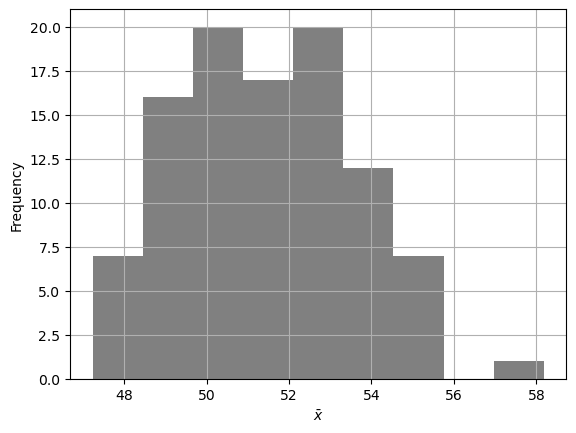

In [4]:
# The book figure was created using a different bootstrapping code and therefore looks different.
np.random.seed(seed=1)

x = stats.norm(loc=50, scale=25).rvs(100)
ci, mean_results = pg.compute_bootci(x, func=lambda x: np.mean(x), n_boot=100, return_dist=True, seed=1)
print(mean_results)
ax = pd.Series(mean_results).hist(bins=9, color='grey')
ax.set_xlabel(r'$\bar{x}$')
ax.set_ylabel('Frequency')
plt.show()

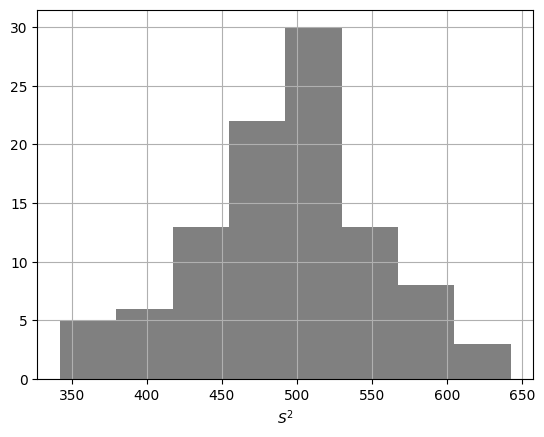

In [4]:
# The book figure was created using a different bootstrapping code and therefore looks different.
B = pg.compute_bootci(x, func=lambda x: np.var(x), n_boot=100, return_dist=True, seed=1)

ax = pd.Series(B[1]).hist(bins=8, color='grey')
ax.set_xlabel(r'$S^2$')
plt.show()

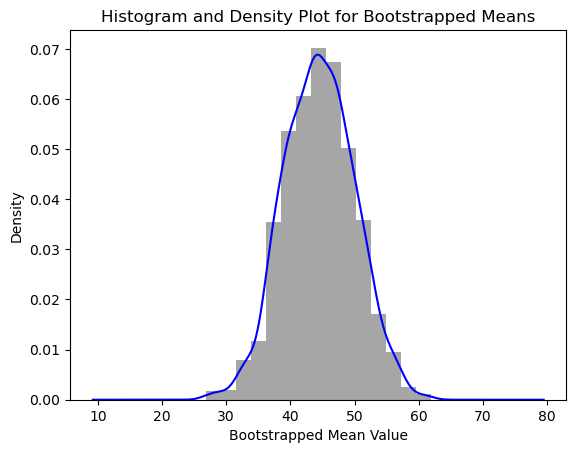

Some expected frequencies are less than 5. Consider adjusting the bins.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from scipy import stats

# Your setup
np.random.seed(1)
x = stats.uniform(1, 100).rvs(30)
mean_results = pg.compute_bootci(x, func='mean', n_boot=2000, return_dist=True, seed=1)

# Extract the bootstrapped means distribution
bootstrapped_means = mean_results[1]

# Convert the bootstrapped means to a pandas Series
bootstrapped_means_series = pd.Series(bootstrapped_means)

# Plotting
fig, ax = plt.subplots()

# Histogram with density rather than count
bootstrapped_means_series.plot(kind='hist', bins=15, color='grey', alpha=0.7, density=True, ax=ax)

# KDE (Kernel Density Estimate) for the same data
bootstrapped_means_series.plot(kind='kde', color='blue', ax=ax)

# Labels and title
ax.set_xlabel('Bootstrapped Mean Value')
ax.set_ylabel('Density')
ax.set_title('Histogram and Density Plot for Bootstrapped Means')

plt.show()

# We test here whether the model N(50.5,83.325) fits this data.
# Assuming bootstrapped_means_series is already defined as your bootstrapped means series
# Parameters of the normal distribution
mu = 50.5
sigma = np.sqrt(83.325)  # Standard deviation is the square root of variance

# Bin the data: You can adjust the number of bins based on your data
bin_counts, bin_edges = np.histogram(bootstrapped_means_series, bins='auto',
                                     density=False)

# Calculate expected frequencies for bins
cdf = stats.norm.cdf(bin_edges, mu, sigma)
expected_freq = np.diff(cdf) * len(bootstrapped_means_series)

# Ensure all expected frequencies are greater than 5 for chi-square validity
if np.all(expected_freq >= 5):
    # Calculate chi-square statistic and p-value
    chi_square_stat, p_value = stats.chisquare(f_obs=bin_counts, f_exp=expected_freq)
    
    print(f"Chi-square Statistic: {chi_square_stat}, P-value: {p_value}")
else:
    print("Some expected frequencies are less than 5. Consider adjusting the bins.")


In [2]:
help(pg.compute_bootci)

Help on function compute_bootci in module pingouin.effsize:

compute_bootci(x, y=None, func=None, method='cper', paired=False, confidence=0.95, n_boot=2000, decimals=2, seed=None, return_dist=False)
    Bootstrapped confidence intervals of univariate and bivariate functions.
    
    Parameters
    ----------
    x : 1D-array or list
        First sample. Required for both bivariate and univariate functions.
    y : 1D-array, list, or None
        Second sample. Required only for bivariate functions.
    func : str or custom function
        Function to compute the bootstrapped statistic. Accepted string values are:
    
        * ``'pearson'``: Pearson correlation (bivariate, paired x and y)
        * ``'spearman'``: Spearman correlation (bivariate, paired x and y)
        * ``'cohen'``: Cohen d effect size (bivariate, paired or unpaired x and y)
        * ``'hedges'``: Hedges g effect size (bivariate, paired or unpaired x and y)
        * ``'mean'``: Mean (univariate = only x)
      

The significance level and confidence level are two fundamental concepts in statistical hypothesis testing and they are closely related.

**Confidence Level**:

The confidence level represents the frequency (i.e., the proportion) of possible confidence intervals that contain the true value of the unknown population parameter. In other words, if we repeated a study over and over, then the proportion of those studies would produce confidence intervals that contain the true parameter would be the confidence level. 

For example, a 95% confidence level means that if the same population were sampled on numerous occasions and interval estimates were made on each occasion, the resulting intervals would bracket the true population parameter in approximately 95% of the cases.

**Significance Level**:

The significance level (denoted by α) is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and decide in favor of the alternative hypothesis. It's the probability of rejecting the null hypothesis when it is true.

For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.

**Relationship**:

The confidence level and significance level are related. If you are testing a hypothesis using a confidence interval, then a significance level of 0.05 corresponds to a confidence level of 95%. If you want to be more confident about your results, you can choose a lower significance level (like 0.01), which would correspond to a higher confidence level (like 99%). 

In other words, a 95% confidence level corresponds to a significance level of 0.05, meaning that you are willing to accept a 5% chance that you are wrong when you reject the null hypothesis.

## Some Methods of Point Estimation

### Moment Equation Estimators

### The Method of Least Squares

### Maximum Likelihood Estimators

## Comparison of Sample Estimates

### Basic Concepts

In [7]:
data = []
for x in range(11):
  data.append({
    'x': x,
    'p10': stats.binom.cdf(x, 20, 0.10),
    'p15': stats.binom.cdf(x, 20, 0.15),
    'p20': stats.binom.cdf(x, 20, 0.20),
    'p25': stats.binom.cdf(x, 20, 0.25),
  })
df = pd.DataFrame(data)

In [6]:
df.round(4)

,x,p10,p15,p20,p25
0,0,0.1216,0.0388,0.0115,0.0032
1,1,0.3917,0.1756,0.0692,0.0243
2,2,0.6769,0.4049,0.2061,0.0913
3,3,0.8670,0.6477,0.4114,0.2252
4,4,0.9568,0.8298,0.6296,0.4148
5,5,0.9887,0.9327,0.8042,0.6172
6,6,0.9976,0.9781,0.9133,0.7858
7,7,0.9996,0.9941,0.9679,0.8982
8,8,0.9999,0.9987,0.9900,0.9591
9,9,1.0000,0.9998,0.9974,0.9861


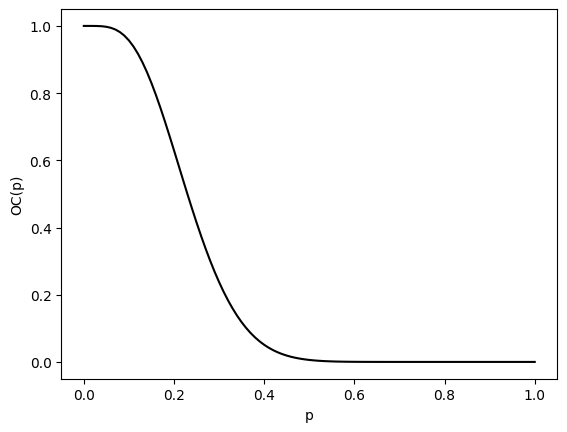

In [7]:
from mistat.acceptanceSampling import OperatingCharacteristics2c
X = OperatingCharacteristics2c(20, 4, oc_type='binomial')
df = pd.DataFrame({'p': X.pd, 'OC(p)': X.paccept})
ax = df.plot(x='p', y='OC(p)', legend=False, color='black')
ax.set_ylabel('OC(p)')
plt.show()

The relative importance of Type I and Type II errors depends on the specific context and potential consequences of each type of error. In some experiments or studies, a Type II error (failing to reject a false null hypothesis) might be considered more serious than a Type I error (incorrectly rejecting a true null hypothesis). Here are a few examples:

1. **Medical Trials**: In a clinical trial for a new drug or treatment, a Type II error could mean failing to detect a true effect of the treatment. This could lead to potentially beneficial treatments being discarded, which could have serious implications for patient health. Therefore, researchers might prioritize minimizing Type II errors in this context.

2. **Quality Control/Manufacturing**: In a quality control context, a Type II error could mean failing to detect a defective product or process. This could lead to poor quality products being released, which could harm the company's reputation and customer satisfaction. Therefore, minimizing Type II errors might be prioritized.

3. **Environmental Studies**: In studies assessing the impact of human activities on the environment, a Type II error could mean failing to detect a true negative impact. This could lead to continued harmful activities and long-term environmental damage. Therefore, minimizing Type II errors might be prioritized.

In these cases, researchers might choose a higher power (which is 1 - the probability of a Type II error) for their tests to reduce the chance of Type II errors. However, it's important to note that increasing the power of a test (and thus reducing Type II errors) often requires increasing the sample size or the effect size, which might not always be feasible.

## Power test

Balancing Type I and Type II errors often involves adjusting the significance level (alpha) of your test and/or the power (1 - beta) of your test. This can be done using power analysis, which allows you to calculate the required sample size to detect an effect of a certain size with a certain degree of confidence, given a certain significance level.

Here's an example of how you might do this using the `statsmodels` library in Python, which provides functions for power analysis:



In [9]:
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_size = 0.8
alpha = 0.05  # significance level
power = 0.8

# perform power analysis
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha)
print('Required sample size: %.3f' % sample_size)

Required sample size: 25.525




In this code, we're using the `TTestIndPower` class to perform a power analysis for an independent two-sample t-test. We specify an effect size of 0.8, a significance level of 0.05, and a desired power of 0.8. The `solve_power` method then calculates the required sample size to achieve these parameters.

This is a simple example, and the specific code would depend on the type of test you're performing and the specifics of your experiment or study. Also, keep in mind that power analysis is based on several assumptions (about the effect size, variance, etc.) that might not hold true in all situations.

Sure, here's a Python code snippet that uses matplotlib to illustrate how the power of a test changes with effect size, sample size, and significance level. This code creates three plots, each showing the density curves under the null and alternative hypotheses for different values of one of the parameters, while keeping the other two parameters constant.



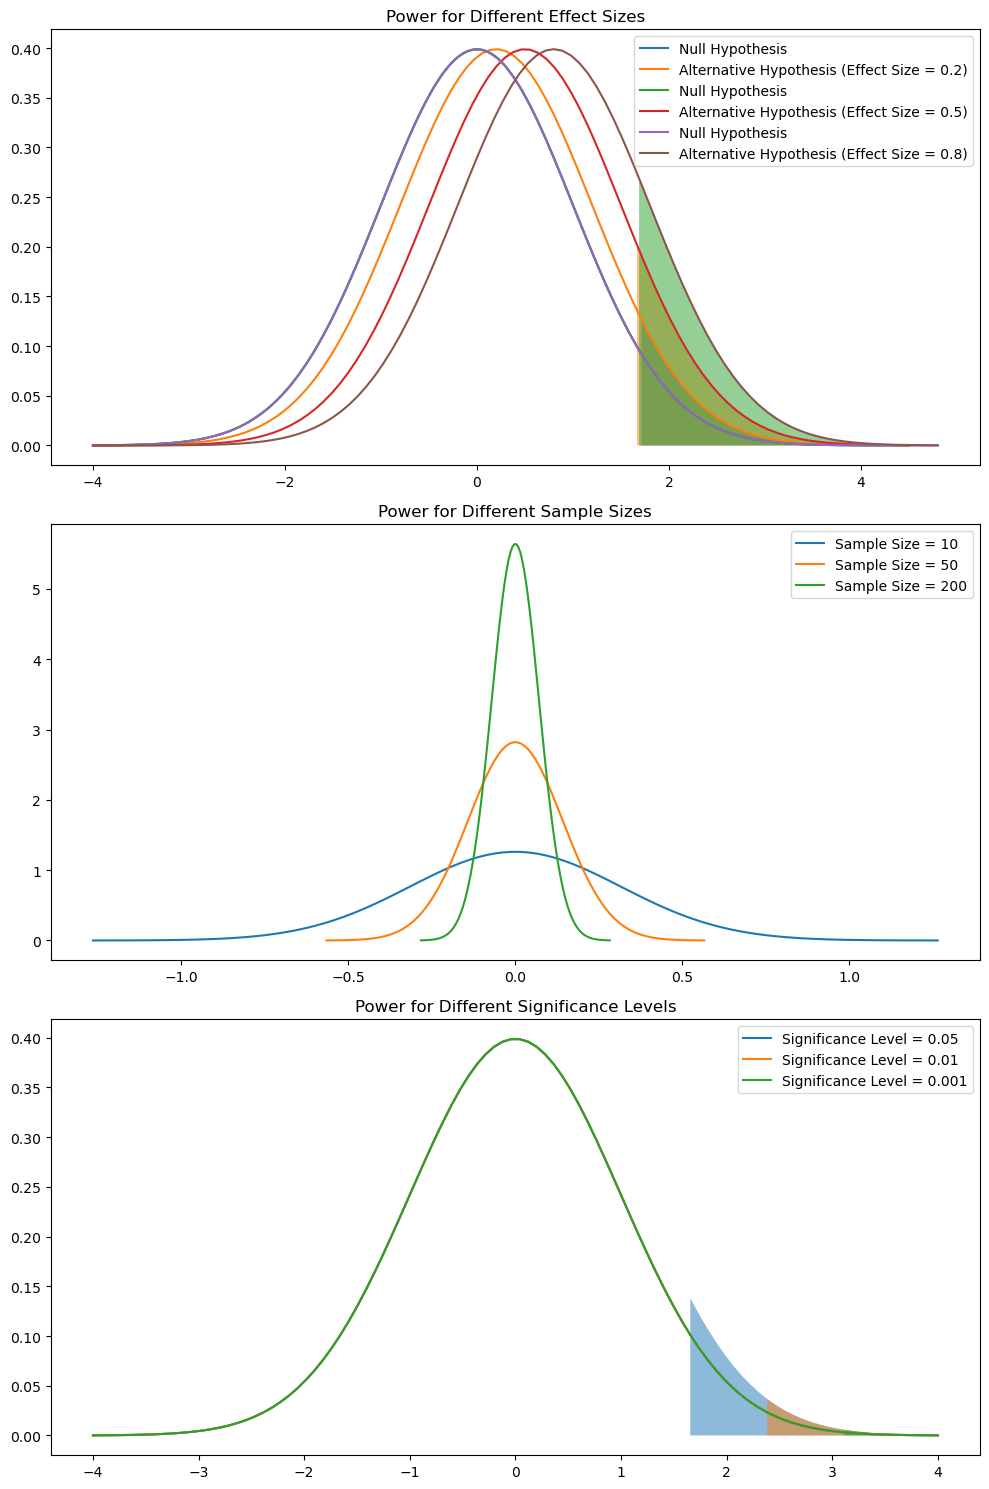

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
effect_sizes = [0.2, 0.5, 0.8]
sample_sizes = [10, 50, 200]
significance_levels = [0.05, 0.01, 0.001]

# Null hypothesis values
mu_null = 0
sigma_null = 1

# Create subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Plot for different effect sizes
for i, effect_size in enumerate(effect_sizes):
    mu_alt = mu_null + effect_size
    x = np.linspace(mu_null - 4*sigma_null, mu_alt + 4*sigma_null, 100)
    axs[0].plot(x, norm.pdf(x, mu_null, sigma_null), label='Null Hypothesis')
    axs[0].plot(x, norm.pdf(x, mu_alt, sigma_null), label=f'Alternative Hypothesis (Effect Size = {effect_size})')
    axs[0].fill_between(x, 0, norm.pdf(x, mu_alt, sigma_null), where=(x>norm.ppf(0.95)), alpha=0.5)
axs[0].set_title('Power for Different Effect Sizes')
axs[0].legend()

# Plot for different sample sizes
for i, sample_size in enumerate(sample_sizes):
    sigma = sigma_null / np.sqrt(sample_size)
    x = np.linspace(mu_null - 4*sigma, mu_null + 4*sigma, 100)
    axs[1].plot(x, norm.pdf(x, mu_null, sigma), label=f'Sample Size = {sample_size}')
    axs[1].fill_between(x, 0, norm.pdf(x, mu_null + effect_sizes[0], sigma), where=(x>norm.ppf(0.95)), alpha=0.5)
axs[1].set_title('Power for Different Sample Sizes')
axs[1].legend()

# Plot for different significance levels
for i, significance_level in enumerate(significance_levels):
    x = np.linspace(mu_null - 4*sigma_null, mu_null + 4*sigma_null, 100)
    axs[2].plot(x, norm.pdf(x, mu_null, sigma_null), label=f'Significance Level = {significance_level}')
    axs[2].fill_between(x, 0, norm.pdf(x, mu_null + effect_sizes[0], sigma_null), where=(x>norm.ppf(1-significance_level)), alpha=0.5)
axs[2].set_title('Power for Different Significance Levels')
axs[2].legend()

plt.tight_layout()
plt.show()



In each plot, the filled area under the alternative hypothesis curve to the right of the critical value represents the power of the test. As you can see, the power increases with larger effect sizes, larger sample sizes, and higher significance levels.

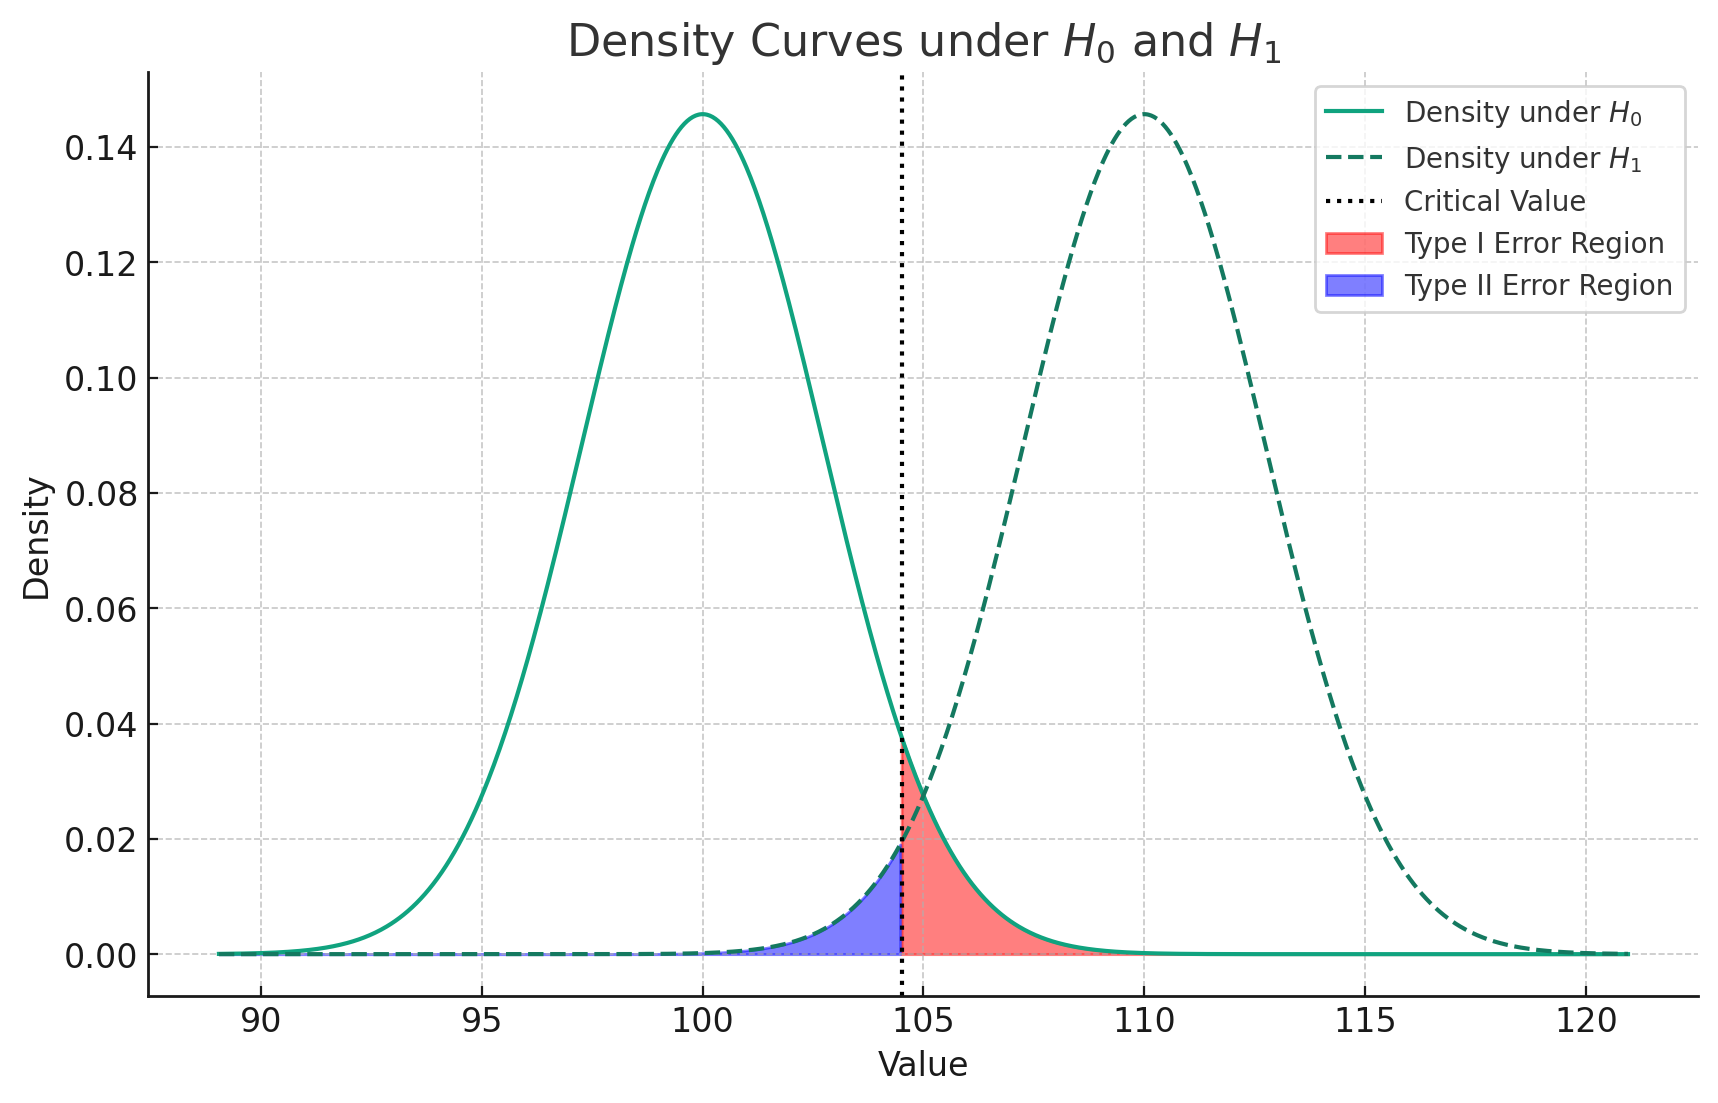

In the base scenario illustrated above, we see two density curves:

The solid line represents the distribution under the null hypothesis ($H_0$), centered around $\mu_0 = 100$.
The dashed line represents the distribution under the alternative hypothesis ($H_1$), centered around $\mu_1 = 110$ (effect size, $\delta = 10$).

Next, let's demonstrate how changes in effect size, sample size, and significance level affect the test's power by adjusting these parameters and observing the changes in the density plots and the error regions.

1. Increasing Effect Size
The first plot shows the impact of increasing the effect size (from $\delta = 10$ to $\delta = 20$). The distribution under $H_1$ (dashed line) is further to the right, significantly reducing the Type II error region (blue shaded area), which increases the power of the test. This demonstrates that larger differences between the null and alternative hypotheses are easier to detect.

2. Increasing Sample Size
The second plot illustrates the effect of increasing the sample size (from $n = 30$ to $n = 100$). The distributions become narrower due to the decreased standard error, which also reduces the Type II error region, thus increasing the test's power. This shows that larger sample sizes improve the test's ability to distinguish between the null and alternative hypotheses.

3. Decreasing Significance Level
The third plot shows the impact of decreasing the significance level (from $\alpha = 0.05$ to $\alpha = 0.01$). The critical value (dotted line) shifts to the right, making the criterion for rejecting the null hypothesis more stringent. This decreases the Type I error region (red shaded area) but slightly increases the Type II error region, indicating a trade-off between the risks of Type I and Type II errors. Decreasing the significance level reduces the probability of falsely rejecting the null hypothesis but at the cost of making the test less sensitive (i.e., potentially reducing power).

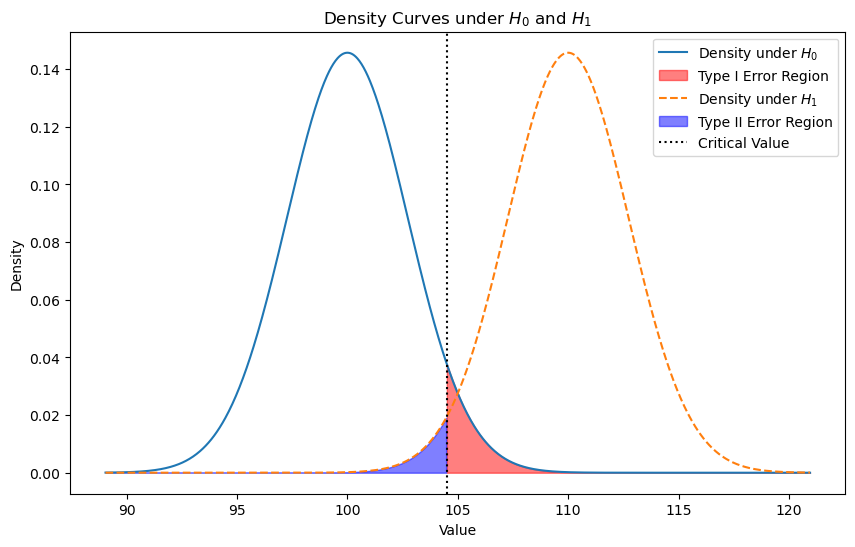

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_density_curves(mu0, mu1, sigma, n, alpha):
    # Calculate standard error and z-score for the significance level
    se = sigma / np.sqrt(n)
    z = norm.ppf(1 - alpha)
    
    # Calculate critical value for rejection of H0
    critical_value = mu0 + z * se
    
    # Range for plotting
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
    
    # Density under H0 and H1
    y0 = norm.pdf(x, mu0, se)
    y1 = norm.pdf(x, mu1, se)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, y0, label='Density under $H_0$')
    plt.fill_between(x, y0, where=(x >= critical_value), color='red', alpha=0.5, label='Type I Error Region')
    plt.plot(x, y1, label='Density under $H_1$', linestyle='--')
    plt.fill_between(x, y1, where=(x <= critical_value), color='blue', alpha=0.5, label='Type II Error Region')
    
    plt.axvline(critical_value, color='black', linestyle='dotted', label='Critical Value')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Density Curves under $H_0$ and $H_1$')
    
    plt.show()

# Base scenario parameters
mu0 = 100
sigma = 15
n = 30
alpha = 0.05

# Effect size (difference in means)
delta = 10

# Calculate mu1 for the alternative hypothesis
mu1 = mu0 + delta

# Plot the base scenario
plot_density_curves(mu0, mu1, sigma, n, alpha)

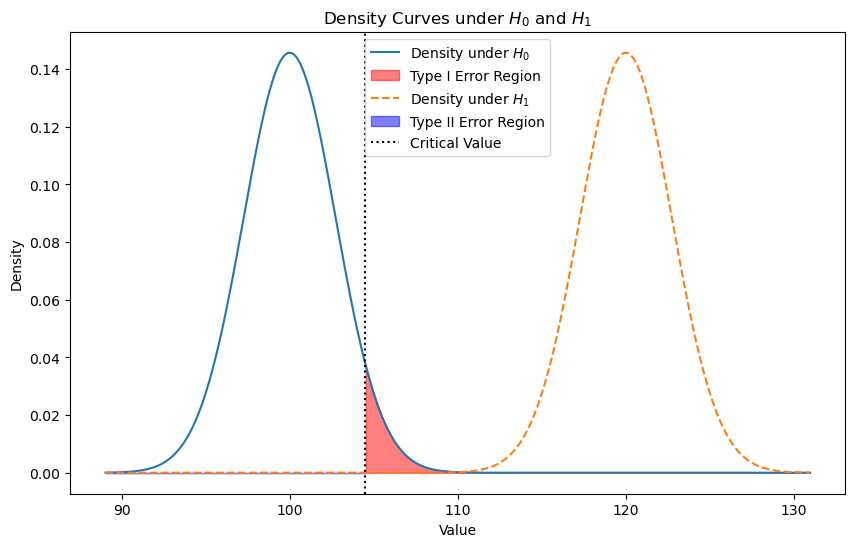

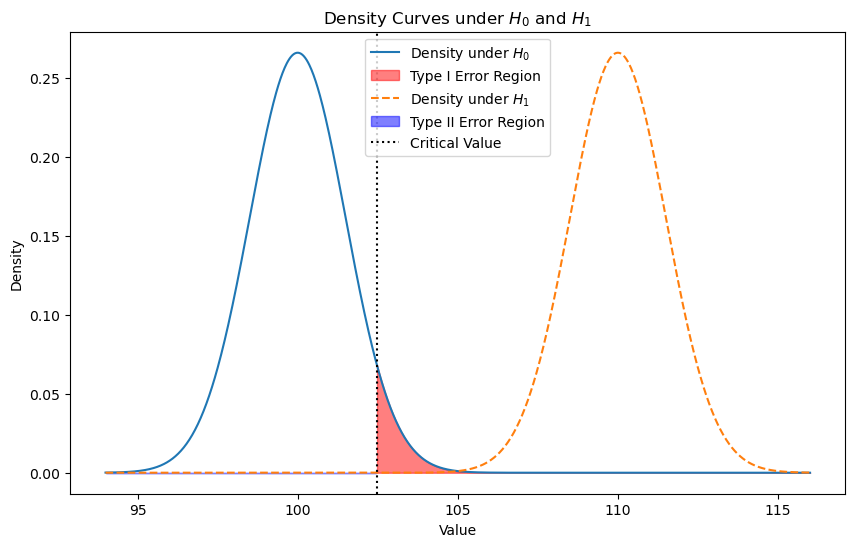

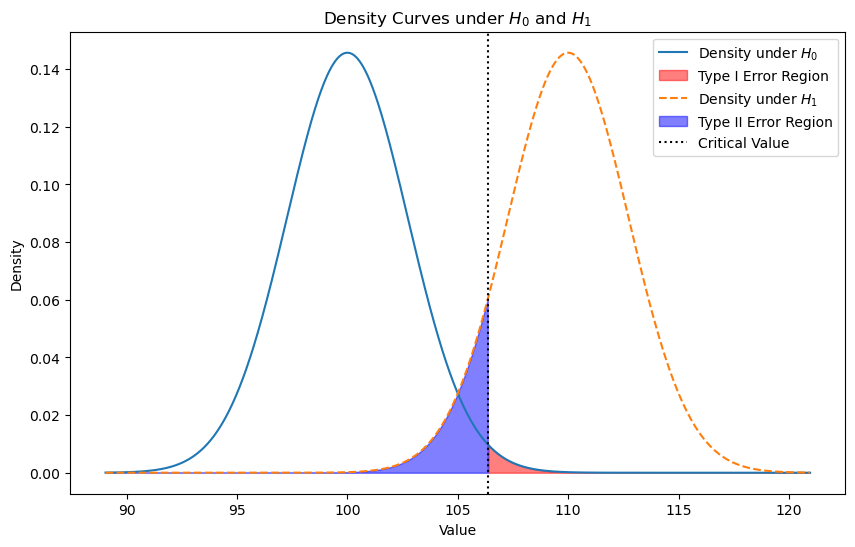

In [14]:
# 1. Increasing Effect Size (delta)
delta_increased = 20
mu1_increased = mu0 + delta_increased

# Plot with increased effect size
plot_density_curves(mu0, mu1_increased, sigma, n, alpha)

# 2. Increasing Sample Size
n_increased = 100

# Plot with increased sample size (keeping original effect size delta)
plot_density_curves(mu0, mu1, sigma, n_increased, alpha)

# 3. Decreasing Significance Level
alpha_decreased = 0.01

# Plot with decreased significance level (keeping original n and delta)
plot_density_curves(mu0, mu1, sigma, n, alpha_decreased)


### Some Common One-Sample Tests of Hypotheses

#### The $Z$-test:  Testing the Mean of a Normal Distribution, $\sigma^2$ Known

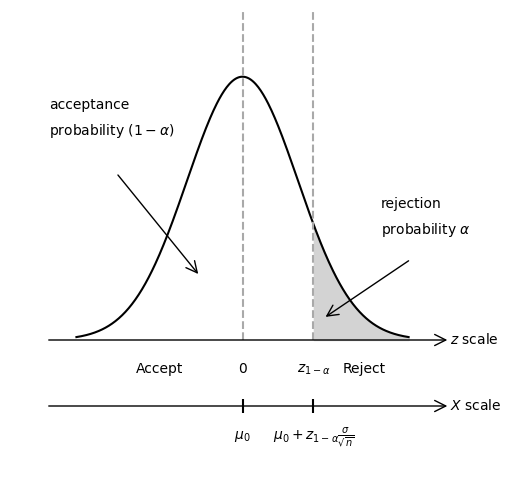

In [8]:
x = np.linspace(-3, 3, 401)
y = stats.norm.pdf(x)

fig, ax = plt.subplots(figsize=[6, 6])
ax.plot(x, y, c='black')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}

zma = stats.norm.ppf(0.9)
ax.fill_between(x[x>zma], y[x>zma], color="lightgrey")
ax.vlines([0, zma], ymin=0, ymax=0.5, linestyles='--', color='darkgrey')
ax.vlines([0, zma], ymin=-0.11, ymax=-0.09, linestyles='-', color='black')

plt.annotate("", xy=(3.7, 0), xytext=(-3.5, 0), arrowprops=prop)
plt.annotate("", xy=(3.7, -0.1), xytext=(-3.5, -0.1), arrowprops=prop)
ax.text(3.75, 0, r'$z$ scale', verticalalignment='center')
ax.text(3.75, -0.1, r'$X$ scale', verticalalignment='center')

plt.annotate("", xy=(-0.8, 0.1), xytext=(-2.25,0.25), arrowprops=prop)
ax.text(-3.5, 0.35, r'acceptance')
ax.text(-3.5, 0.31, r'probability $(1-\alpha)$')
plt.annotate("", xy=(1.5, 0.035), xytext=(3,0.12), arrowprops=prop)
ax.text(2.5, 0.2, r'rejection')
ax.text(2.5, 0.16, r'probability $\alpha$')

ax.set_xlim(-4.2, 4.2)
ax.set_ylim(-0.2, 0.5)

options = {'horizontalalignment': 'center'}
ax.text(-1.5, -0.05, 'Accept', **options)
ax.text(2.2, -0.05, 'Reject', **options)
ax.text(0, -0.05, '0', **options)
ax.text(zma, -0.05, r'$z_{1-\alpha}$', **options)

# options = {'horizontalalignment': 'center', 'verticalalignment': 'center'}
ax.text(0, -0.15, r'$\mu_0$', **options)
ax.text(zma, -0.152, r'$\mu_0 + z_{1-\alpha} \frac{\sigma}{\sqrt{n}}$', **options)

plt.axis('off')
plt.show()

## OCN 테이블

In [15]:
data = []
n = 100
mu0 = 5
sigma = 0.2
alpha = 0.05
for mu in (5, 5.01, 5.02, 5.03, 5.04, 5.05):
  dsn = np.sqrt(n) * (mu - mu0) / sigma
  z  = stats.norm.ppf(1-alpha) - dsn
  data.append({
    'mu': mu,
    'dsn': dsn,
    'z': z,
    'OC': stats.norm.cdf(z),
  })
df = pd.DataFrame(data)

In [10]:
df.round(4)

,mu,dsn,z,OC
0,5.00,0.0,1.6449,0.9500
1,5.01,0.5,1.1449,0.8739
2,5.02,1.0,0.6449,0.7405
3,5.03,1.5,0.1449,0.5576
4,5.04,2.0,-0.3551,0.3612
5,5.05,2.5,-0.8551,0.1962


#### The $t$-Test:  Testing the Mean of a Normal Distribution, $\sigma^2$ Unknown

In [19]:
from scipy import stats
x = [0.53, 0.54, 0.48, 0.50, 0.50, 0.49, 0.52]
n = len(x)
mu = 0.5
alpha = 0.05
t = (np.mean(x) - mu) / (np.std(x, ddof=1) / np.sqrt(n)) 
p = 2 * (1 - stats.t.cdf(np.abs(t), df=n-1))
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
print(t, p, t_crit)

1.034072981318565 0.3409696126731614 2.4469118487916806


In [20]:
import numpy as np
from scipy import stats

x = [0.53, 0.54, 0.48, 0.50, 0.50, 0.49, 0.52]
mu0 = 0.5

t_stat, p_value = stats.ttest_1samp(x, mu0)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 1.0340729813185647
p-value: 0.3409696126731613


#### The Chi-Squared Test:  Testing the Variance of a Normal Distribution

In [25]:
import numpy as np
from scipy import stats

x = [0.53, 0.54, 0.48, 0.50, 0.50, 0.49, 0.52]
n = len(x)
df = n - 1
chi_sq0 = 0.0004
chi_stat = (n-1) * np.var(x, ddof=1) / chi_sq0
p_value = stats.chi2.sf(chi_stat, df) 
chi_crit = stats.chi2.ppf(1-0.05, df)
print(chi_stat, p_value, chi_crit)

7.214285714285727 0.3014841536941494 12.591587243743977


In [22]:
import numpy as np
from scipy import stats

x = [0.53, 0.54, 0.48, 0.50, 0.50, 0.49, 0.52]
n = len(x)
sample_var = np.var(x, ddof=1)  # sample variance
sigma0_square = 0.0004  # hypothesized variance

# Chi-square statistic
chi_square_stat = (n - 1) * sample_var / sigma0_square

# Degrees of freedom
df = n - 1

# Calculate the critical chi-square value for the 95% confidence level
chi_square_crit = stats.chi2.ppf(0.95, df)

print(f"Chi-square statistic: {chi_square_stat}")
print(f"Critical chi-square value: {chi_square_crit}")

Chi-square statistic: 7.214285714285727
Critical chi-square value: 12.591587243743977


In [ ]:
if chi_square_stat > chi_square_crit:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

## A custom function to perform the chi-square test for variance

Unfortunately, there's no built-in function in scipy.stats for performing a chi-square test for variance like there is for a t-test. The chi-square test for variance is less commonly used than the t-test, and it's typically done manually as shown in the previous response.

However, you can create a custom function to perform the chi-square test for variance. Here's how you can do it:



In [26]:
import numpy as np
from scipy import stats

def chi_square_test_variance(data, hypothesized_variance, alpha=0.05):
    n = len(data)
    sample_variance = np.var(data, ddof=1)
    chi_square_stat = (n - 1) * sample_variance / hypothesized_variance
    critical_value = stats.chi2.ppf(1 - alpha, df=n-1)
    p_value = 1 - stats.chi2.cdf(chi_square_stat, df=n-1)
    return chi_square_stat, p_value, critical_value

x = [0.53, 0.54, 0.48, 0.50, 0.50, 0.49, 0.52]
hypothesized_variance = 0.0004

chi_square_stat, p_value, critical_value = chi_square_test_variance(x, hypothesized_variance)

print(f"Chi-square statistic: {chi_square_stat}")
print(f"p-value: {p_value}")
print(f"Critical chi-square value: {critical_value}")

Chi-square statistic: 7.214285714285727
p-value: 0.3014841536941494
Critical chi-square value: 12.591587243743977




This function calculates the chi-square statistic, the p-value, and the critical chi-square value. If the p-value is less than your chosen significance level (typically 0.05), you would reject the null hypothesis and conclude that the variance is greater than the hypothesized variance. If the p-value is greater than your chosen significance level, you would fail to reject the null hypothesis and conclude that the data does not provide strong evidence that the variance is greater than the hypothesized variance.

#### Testing Hypotheses About the Success Probability, $p$, in Binomial Trials

In [11]:
stats.binom(20, 0.2).ppf(0.95)

7.0

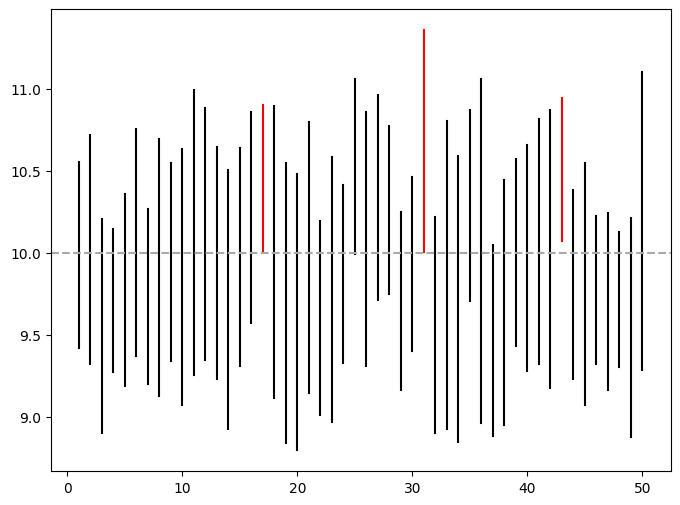

In [12]:
np.random.seed(seed=7) # bootstrapped uses numpy to create random numbers

df = pd.DataFrame({'x': stats.norm(loc=10, scale=1).rvs(500)})

model = smf.ols(formula='x ~ 1', data=df[1:10]).fit()
model.conf_int(alpha=0.05).loc['Intercept', :]

confIntervals = []
for _ in range(50):
    df_sample = df.sample(10, replace=True)
    model = smf.ols(formula='x ~ 1', data=df_sample).fit()
    confIntervals.append(list(model.conf_int(alpha=0.05).loc['Intercept', :]))

fig, ax = plt.subplots(figsize=[8, 6])
for repeat, (lower, upper) in enumerate(confIntervals, 1):
    ax.plot([repeat, repeat], [lower, upper], color='black' if lower < 10 < upper else 'red')
ax.axhline(10, linestyle='--', color='darkgrey')
plt.show()

nrCoverConfIntervals = sum(lower <= 10 <= upper for lower, upper in confIntervals)

## Confidence Intervals

### Confidence Intervals for $\mu$; $\sigma$ Known

In [ ]:
# creat 20 random numbers from a normal distribution
np.random.seed(seed=7) # bootstrapped uses numpy to create random numbers
x = stats.norm(loc=10, scale=1).rvs(20)

# get the mean of x
mean_x = np.mean(x)

# hull hypothesis: mean of x is 10
mu0 = 10

# standard deviation of x
sigma = np.std(x, ddof=1)

# t-statistic
t_stat = (mean_x - mu0) / (sigma / np.sqrt(20))

t_crit = stats.t.ppf(1-0.05/2, df=19)

# hull hypothesis: standard deviation of x is 1
sigma0 = 1

# chi-square statistic
chi_stat = (19 * sigma**2) / (1**2)

# critical chi-square value
chi_crit = stats.chi2.ppf(1-0.05, df=19)

print(t_stat, t_crit, chi_stat, chi_crit)

# z statistic
z_stat = (mean_x - mu0) / (sigma0 / np.sqrt(20))
z_crit = stats.norm.ppf(1-0.05/2)

# ttest_1samp
t_stat, p_value = stats.ttest_1samp(x, mu0)

# confidence interval
ci = stats.t.interval(0.95, loc=mean_x, scale=sigma/np.sqrt(20), df=19)
print(ci)



In [27]:
help(stats.t)

Help on t_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.t_gen object>
    A Student's t continuous random variable.
    
    For the noncentral t distribution, see `nct`.
    
    As an instance of the `rv_continuous` class, `t` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(df, loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, df, loc=0, scale=1)
        Probability density function.
    logpdf(x, df, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, df, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, df, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, df, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, df, loc=0

### Confidence Intervals for $\mu$; $\sigma$ Unknown

In [28]:
import numpy as np
from scipy import stats
x = [16.16, 9.33, 12.96, 11.49, 12.31, 8.93, 6.02, 10.66, 7.75, 15.55, 3.58, 11.34, 11.38, 6.53, 9.75, 9.47]
n = len(x)
x_mean = np.mean(x)
x_sd = np.std(x, ddof=1)
alpha = 0.05
t_L = stats.t.ppf(alpha/2, df=n-1)
t_U = stats.t.ppf(1- alpha/2, df=n-1)

ci_tL = x_mean - t_U * x_sd / np.sqrt(n)
ci_tU = x_mean + t_U * x_sd / np.sqrt(n)

print(f'CI for mean is ({ci_tL},{ci_tU})')

CI for mean is (8.43516957251492,11.966080427485082)


In [31]:
# t test for mean = 10
mu0 = 10
t_stat = (x_mean - mu0) / (x_sd / np.sqrt(n))
p_value = 2 * stats.t.cdf(-np.abs(t_stat), df=n-1)  # two-tailed test

# decision rule
if p_value < alpha:
    print(f'Reject the null hypothesis. p-value = {p_value}')
else:
    print(f'Fail to reject the null hypothesis. p-value = {p_value}')


Fail to reject the null hypothesis. p-value = 0.8118930182354114


### Confidence Intervals for $\sigma^2$

In [29]:
chi_L = stats.chi2.ppf(alpha/2, df=n-1)
chi_U = stats.chi2.ppf(1- alpha/2, df=n-1)

ci_chi2L =  (n-1) *  x_sd**2 / chi_U
ci_chi2U = (n-1) *  x_sd**2 / chi_L

print(f'CI for chi2 is ({ci_chi2L},{ci_chi2U})')

CI for chi2 is (5.989978918301034,26.29371935576559)


### Confidence Intervals for $p$

## Tolerance Intervals

### Tolerance Intervals for the Normal Distributions

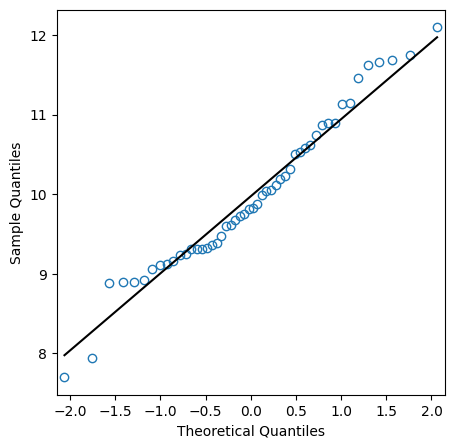

In [13]:
np.random.seed(1)
x = stats.norm(loc=10, scale=1).rvs(50)

fig, ax = plt.subplots(figsize=[5, 5])
sm.qqplot(x, line='s', ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
plt.show()

## Testing for Normality with Probability Plots

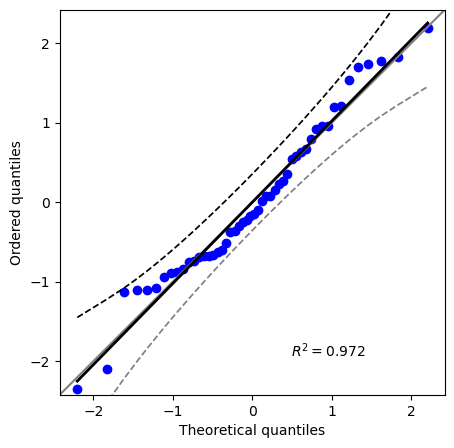

In [33]:
np.random.seed(1)
x = stats.norm(loc=10, scale=1).rvs(50)
fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(x, ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()

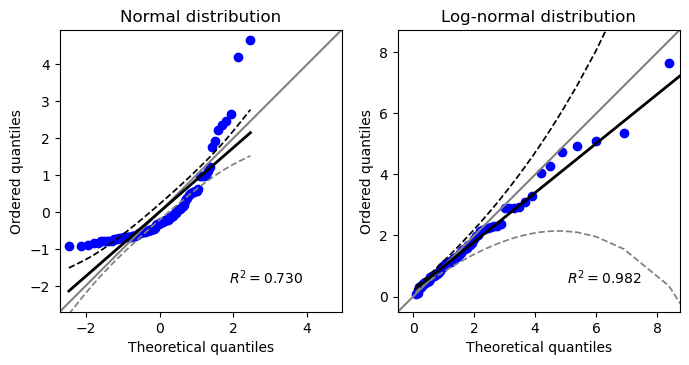

In [35]:
np.random.seed(1)
x = stats.lognorm.rvs(1, size=100)

fig, axes = plt.subplots(figsize=[8, 4], ncols=2)
pg.qqplot(x, ax=axes[0])
axes[0].set_title('Normal distribution')
pg.qqplot(x, dist=stats.lognorm, sparams=[1], ax=axes[1])
axes[1].set_title('Log-normal distribution')
for ax in axes:
  ax.get_lines()[0].set_color('grey')
  ax.get_lines()[0].set_markerfacecolor('none')
  ax.get_lines()[1].set_color('black')
  ax.get_lines()[2].set_color('black')
  ax.get_lines()[3].set_color('grey')
  # ax.get_lines()[4].set_color('grey')
plt.show()

In [36]:
res = stats.probplot(x) 
r2_normal = res[1][2] ** 2
res = stats.probplot(x, dist=stats.lognorm, sparams=[1])
r2_lognormal = res[1][2] ** 2

In [37]:
help(stats.probplot)

Help on function probplot in module scipy.stats._morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e.

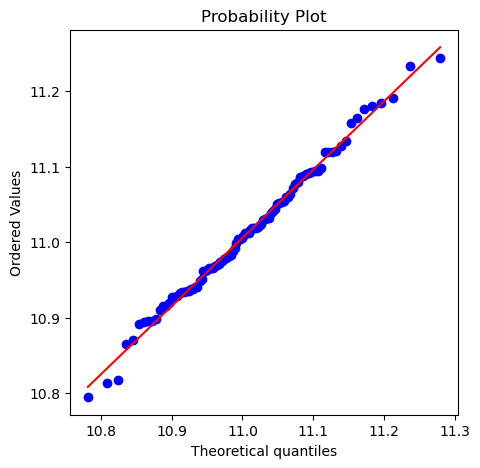

In [38]:
np.random.seed(1)
dist=stats.lognorm(s=0.1,loc=10)
x = dist.rvs(100)

fig, ax = plt.subplots(figsize=[5, 5])
stats.probplot(x, dist=stats.lognorm, sparams=[0.1, 10, 1], plot=ax)
plt.show()

In the context of the lognormal distribution as used in your code snippet, the parameters `s`, `loc`, and the implicit scale parameter (which is different from the `scale` argument you mentioned, as it's actually set by the third value in `sparams` during the probability plot) have specific meanings that differ from each other and from the standard deviation of the distribution. Let's clarify these differences:

1. **Shape Parameter (`s`)**: This is often denoted as \(\sigma\) in the context of the lognormal distribution and represents the standard deviation of the underlying normally distributed logarithm of the random variable. This parameter controls the spread of the distribution. It's important to note that this is not the standard deviation of the lognormal distribution itself but of the log of the values that follow a normal distribution. The shape parameter affects the skewness and kurtosis of the lognormal distribution.

2. **Scale Parameter**: In the context of the lognormal distribution, the scale parameter corresponds to the mean of the underlying normal distribution of the logarithm of the random variable, often denoted as \(\mu\). In your code, however, the scale parameter is implicitly set by the `1` in `sparams=[0.1, 10, 1]` during the probability plot call. This is a bit of a misunderstanding, as the `sparams` argument in `stats.probplot` for a lognormal distribution expects parameters in the order `(s, loc, scale)`, where `scale` is indeed the `exp(mu)` for the lognormal distribution, not the mean of the underlying normal distribution. The `scale` argument in the distribution instantiation (`stats.lognorm`) directly sets this `exp(mu)` parameter, which serves as a scaling factor for the distribution.

3. **Standard Deviation of the Lognormal Distribution**: This is not directly set by any single parameter in the distribution's definition. Instead, it's a function of both the shape (\(\sigma\)) and the scale (\(\exp(\mu)\)) parameters. The standard deviation of a lognormal distribution can be quite different from the shape parameter and is calculated using the formula:
   \[
   \sigma_{\text{lognormal}} = \sqrt{\left(\exp(\sigma^2) - 1\right) \cdot \exp(2\mu + \sigma^2)}
   \]
   where \(\mu\) and \(\sigma\) are the mean and standard deviation of the underlying normal distribution of the log values.

4. **`loc` Parameter**: This parameter shifts the distribution along the x-axis. In a lognormal distribution, it's less commonly used since the distribution is inherently positive and defined for values greater than 0. The `loc` parameter effectively adds a constant to all values drawn from the distribution, which can adjust the minimum value of the distribution but doesn't affect its shape or scale in the same way the `s` and scale parameters do.

In summary, the shape parameter (`s`) defines the spread of the log values in their normal distribution, not the direct spread (standard deviation) of the lognormal distribution itself. The scale parameter implicitly set in `sparams` during the probability plot is actually meant to adjust the scale of the distribution based on the exponential of the mean of the log values. The standard deviation of the lognormal distribution is a derived quantity that depends on both the shape and the scale (exp(mu)) and differs from the shape parameter.

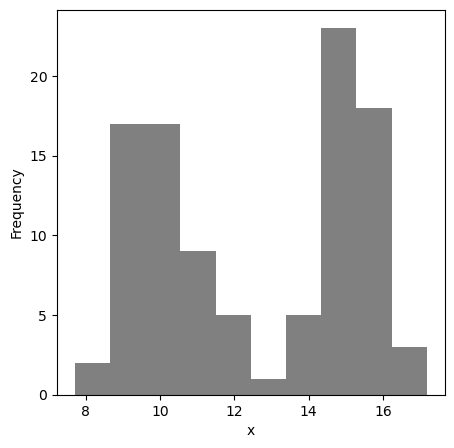

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(1)
x = np.array([*stats.norm.rvs(loc=10, size=50), *stats.norm.rvs(loc=15, size=50)])
# The asterisks (`*`) are used to unpack the lists of random variates generated by the `rvs` methods. 
# This allows the two lists to be concatenated (joined together) into a single list.

fig, ax = plt.subplots(figsize=[5, 5])
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
# pd.Series(x).hist(bins=10, color='grey')
ax.hist(x, bins=10, color='grey') # plt.hist(x, bins=10, color='grey') 이 것도 가능!!
plt.show()

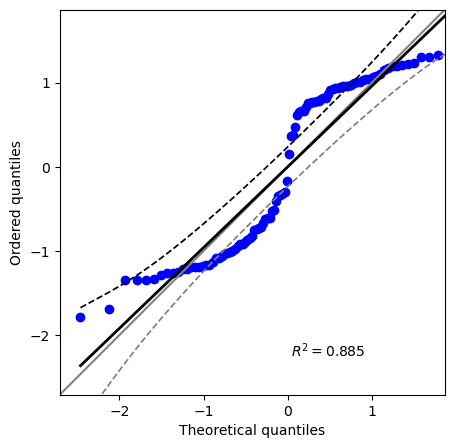

c:\Users\hskim\anaconda3\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
np.random.seed(1)
x = np.array([*stats.norm.rvs(loc=10, size=50), *stats.norm.rvs(loc=15, size=50)])

import pingouin as pg 
fig, ax = plt.subplots(figsize=[5, 5])
pg.qqplot(x, ax=ax)
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
ax.get_lines()[2].set_color('black')
ax.get_lines()[3].set_color('grey')
# ax.get_lines()[4].set_color('grey')
plt.show()


In [7]:
res = stats.probplot(x) # qqplot 동일
r2_normal = res[1][2] ** 2
r2_normal

0.8847601076139165

Yes, both `scipy.stats.probplot` and `pg.qqplot` are used to create QQ plots (quantile-quantile plots), which are graphical tools to help us assess if a dataset follows a given theoretical distribution.

However, there are some differences between the two:

1. `scipy.stats.probplot` is a function from the `scipy.stats` module, which is a part of SciPy, a library for scientific computing in Python. This function returns the coordinates used for the plot and optionally creates the QQ plot if you provide a matplotlib Axes object for the `plot` parameter.

2. `pg.qqplot` is a function from the `pingouin` statistical package, which is a user-friendly and less technical alternative to SciPy for statistical analyses. This function directly creates and returns the QQ plot as a matplotlib Figure object.

In general, you can use either function to create a QQ plot, depending on which library you prefer to use and which function's interface you find more convenient.

There are several statistical tests that you can use to test the normality of a distribution. Here are a few examples:

1. **Shapiro-Wilk Test**: This is a widely used test for normality. The null hypothesis of this test is that the population is normally distributed. If the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.



In [8]:
from scipy import stats

shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.8767837882041931, pvalue=1.329852352682792e-07)



2. **Kolmogorov-Smirnov Test**: This is a test for comparing a sample with a reference probability distribution (one-sample K-S test), or to compare two samples (two-sample K-S test). The null hypothesis of this test is that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case).



In [9]:
ks_test = stats.kstest(x, 'norm')
ks_test

KstestResult(statistic=0.9999999999999931, pvalue=0.0, statistic_location=7.698461303119718, statistic_sign=-1)



3. **Anderson-Darling Test**: This is a statistical test of whether a given sample of data is drawn from a given probability distribution. In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free.



In [10]:
anderson_test = stats.anderson(x, dist='norm')
anderson_test

AndersonResult(statistic=5.29627775334167, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=12.560582852075697, scale=2.745793849130087)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')



In each of these tests, a low p-value (typically below 0.05) indicates that the distribution is not normal.

## Tests of Goodness of Fit

### The Chi-Square Test (Large Samples)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from scipy import stats

# Your setup
np.random.seed(1)
x = stats.uniform(1, 100).rvs(10)
mean_results = pg.compute_bootci(x, func = lambda x: np.mean(x), n_boot=100, return_dist=True, seed=1)

# Extract the bootstrapped means distribution
bootstrapped_means = mean_results[1]

# Convert the bootstrapped means to a pandas Series
bootstrapped_means_series = pd.Series(bootstrapped_means)

# We test here whether the model N(50.5,83.325) fits this data.
# Assuming bootstrapped_means_series is already defined as your bootstrapped means series
# Parameters of the normal distribution
mu = 50.5
sigma = np.sqrt(83.325)  # Standard deviation is the square root of variance

# Re-calculate expected frequencies with manual bin adjustment for demonstration purposes
bin_counts, bin_edges = np.histogram(bootstrapped_means_series, bins=10, density=False)
cdf = stats.norm.cdf(bin_edges, mu, sigma)
expected_freq_unadjusted = np.diff(cdf) * len(bootstrapped_means_series)

# Normalize expected frequencies to match the total number of observations
expected_freq_adjusted = expected_freq_unadjusted * (sum(bin_counts) / sum(expected_freq_unadjusted))

# Check sums before and after adjustment
sum_bin_counts = sum(bin_counts)
sum_expected_freq_unadjusted = sum(expected_freq_unadjusted)
sum_expected_freq_adjusted = sum(expected_freq_adjusted)

print(sum_bin_counts, sum_expected_freq_unadjusted, sum_expected_freq_adjusted)

# Calculate the chi-square statistic manually according to the formula
# Chi-square statistic: χ² = Σ((f_i - e_i)² / e_i) for all bins i=1 to k

# Use the adjusted expected frequencies for this calculation to ensure sums match
chi_square_stat_manual = sum(((f_i - e_i) ** 2) / e_i for f_i, e_i in zip(bin_counts, expected_freq_adjusted))

print(chi_square_stat_manual)
 
print(sum((expected_freq_adjusted - bin_counts)**2 / expected_freq_adjusted))


# Ensure all expected frequencies are greater than 5 for chi-square validity
if np.all(expected_freq >= 5):
  # Calculate chi-square statistic and p-value
    chi_square_stat, p_value = stats.chisquare(f_obs=bin_counts,
                                               f_exp=print(f"Chi-square Statistic: {chi_square_stat}, P-value: {p_value}"))
else:
    print("Some expected frequencies are less than 5. Consider adjusting the bins.")




100 42.2290271522877 100.0
585.5779802895705
585.5779802895705
Some expected frequencies are less than 5. Consider adjusting the bins.


In [7]:
bin_counts

array([ 5,  6, 15, 16, 18, 17, 11,  6,  2,  4], dtype=int64)

In [8]:
expected_freq_adjusted

array([ 0.16211174,  0.4333969 ,  1.04591252,  2.27848648,  4.48066037,
        7.95398309, 12.74607847, 18.43824751, 24.07771513, 28.38340778])

In [9]:
(bin_counts - expected_freq_adjusted)**2

array([ 23.40516281,  30.98707012, 194.71655739, 188.27993325,
       182.7725439 ,  81.8304219 ,   3.04879004, 154.71000107,
       487.42550557, 594.55057493])

In [10]:
bin_edges

array([19.39040809, 22.32318197, 25.25595585, 28.18872972, 31.1215036 ,
       34.05427747, 36.98705135, 39.91982523, 42.8525991 , 45.78537298,
       48.71814685])

In [4]:
# Let's re-calculate the chi-square statistic using the corrected and detailed approach to ensure clarity.

# Assuming bootstrapped_means_series is a pandas Series of bootstrapped means as previously defined.
# Re-defining the normal distribution parameters for clarity
mu = 50.5
sigma = np.sqrt(83.325)  # Standard deviation

# Re-binning the data with a fixed number of bins for consistency in the calculation
bin_counts, bin_edges = np.histogram(bootstrapped_means_series, bins=10, density=False)

# Calculating expected frequencies for these bins based on the normal distribution
cdf = stats.norm.cdf(bin_edges, mu, sigma)
expected_freq_unadjusted = np.diff(cdf) * len(bootstrapped_means_series)

# Adjusting the expected frequencies to ensure the sum matches the total number of observations
expected_freq_adjusted = expected_freq_unadjusted * (sum(bin_counts) / sum(expected_freq_unadjusted))

# Calculating the chi-square statistic manually according to the standard formula
chi_square_stat_manual = sum(((f_i - e_i) ** 2) / e_i for f_i, e_i in zip(bin_counts, expected_freq_adjusted))

chi_square_stat_manual


19045.418969818696

# Start over

In [15]:
# Step 1: Generate sample data from the uniform distribution over the integers {1,...,100}
np.random.seed(1)  # Ensure reproducibility
original_sample = np.random.randint(1, 101, size=10)  # Uniform distribution over {1,...,100}

# Step 2: Perform bootstrap sampling to get sample means
N = 100  # Number of bootstrap samples
bootstrap_means = np.array([np.mean(np.random.choice(original_sample, size=10, replace=True)) for _ in range(N)])

# Step 3: Bin the bootstrap means and calculate observed frequencies
bin_counts, bin_edges = np.histogram(bootstrap_means, bins=10, density=False)

# Step 4: Calculate expected frequencies for N(50.5,83.325)
mu = 50.5
sigma = np.sqrt(83.325)
cdf = stats.norm.cdf(bin_edges, mu, sigma)
expected_freq = np.diff(cdf) * N

# Step 5: Adjust expected frequencies to ensure their sum matches the total number of observations
expected_freq_adjusted = expected_freq * (sum(bin_counts) / sum(expected_freq))

# Step 6: Calculate the chi-square statistic
chi_square_stat = sum(((bin_counts - expected_freq_adjusted) ** 2) / expected_freq_adjusted)

# Printing intermediate values for verification
bootstrap_means_summary = (np.min(bootstrap_means), np.max(bootstrap_means), np.mean(bootstrap_means), np.std(bootstrap_means))
chi_square_stat, bootstrap_means_summary

# Calculate the critical value for the chi-square test
alpha = 0.05  # Significance level
df = 9  # Degrees of freedom

# Critical value at the given significance level and degrees of freedom
chi_square_critical_value = stats.chi2.ppf(1 - alpha, df)

chi_square_critical_value


16.918977604620448

### The Kolmogorov-Smirnov Test

In [19]:
oturb = mistat.load_data('OTURB')

result = stats.kstest(oturb, 'norm',
          args=(np.mean(oturb), np.std(oturb, ddof=1)),
          alternative='two-sided')

## Bayesian Decision Procedures

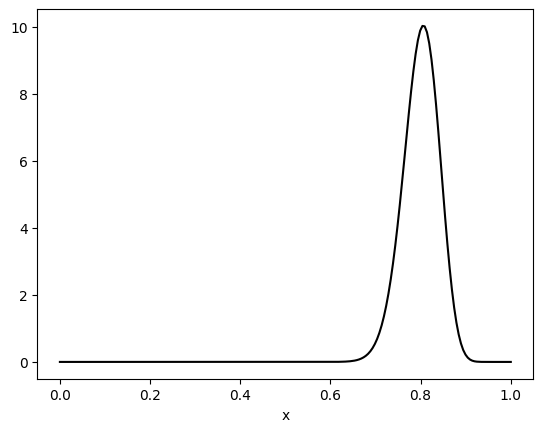

In [20]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'p.d.f.': stats.beta(a=80, b=20).pdf(x),
})
ax = df.plot(x='x', y='p.d.f.', legend=False, color='black')
plt.show()

### Prior and Posterior Distributions

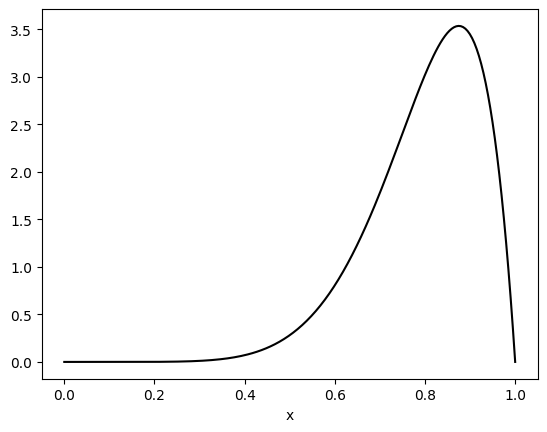

In [21]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'p.d.f.': stats.beta(a=8, b=2).pdf(x),
})
ax = df.plot(x='x', y='p.d.f.', legend=False, color='black')
plt.show()

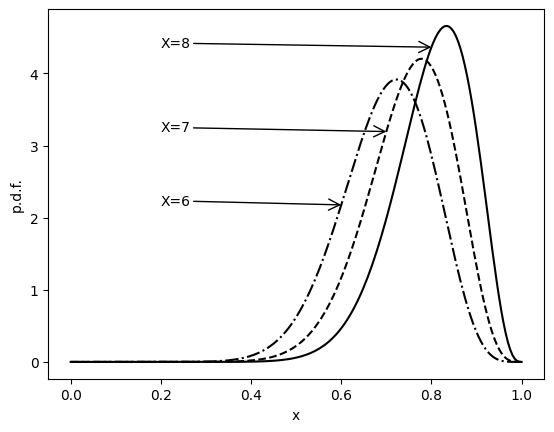

In [22]:
x = np.linspace(0, 1.0, 200)
df = pd.DataFrame({
    'x': x,
    'dist1': stats.beta(a=8 + 8, b=2 + 2).pdf(x),
    'dist2': stats.beta(a=8 + 7, b=2 + 3).pdf(x),
    'dist3': stats.beta(a=8 + 6, b=2 + 4).pdf(x),
})
ax = df.plot(x='x', y='dist1', legend=False, color='black')
df.plot(x='x', y='dist2', legend=False, color='black', ax=ax, linestyle='--')
df.plot(x='x', y='dist3', legend=False, color='black', ax=ax, linestyle='-.')

prop = {'arrowstyle': "->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'black'}
def arrow(text, xvalue, offset):
    y = stats.beta(a=8+8-offset, b=2+2+offset).pdf(xvalue)
    plt.annotate(text, xy=(xvalue, y), xytext=(0.2, y), arrowprops=prop)
arrow('X=8', 0.8, 0)
arrow('X=7', 0.7, 1)
arrow('X=6', 0.6, 2)
ax.set_ylabel('p.d.f.')
plt.show()

### Bayesian Testing and Estimation

#### Bayesian Testing

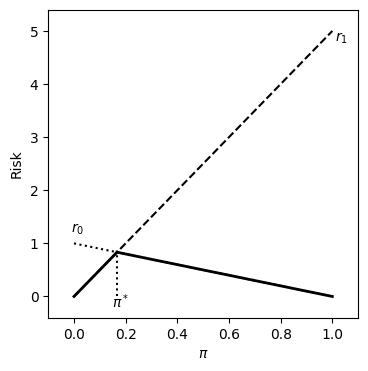

In [23]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.set_xlabel('$\pi$')
ax.set_ylabel('Risk')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.4, 5.4)
ax.plot([0,1], [0,5], linestyle='--', color='black')
ax.plot([0,1], [1,0], linestyle=':', color='black')
ax.plot([1/6,1/6], [0,5*1/6], linestyle=':', color='black')
ax.plot([0,1/6], [0,5*1/6], linewidth=2, color='black')
ax.plot([1/6, 1], [5*1/6, 0], linewidth=2, color='black')
ax.text(-0.01, 1.2, '$r_0$')
ax.text(1.01, 4.8, '$r_1$')
ax.text(1/6-0.02, -0.21, '$\pi^*$')
plt.show()
#lines(rep(1/6, 2), c(0, 5*1/6), lty="dashed")
#lines(c(0, 1/6), c(0, 5*1/6), lwd=2)
#lines(c(1/6, 1), c(5*1/6, 0), lwd=2)

#### Bayesian Estimation

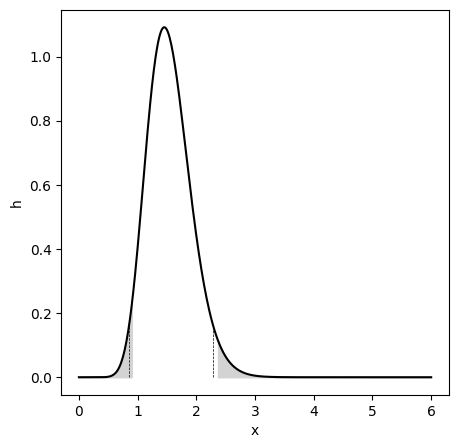

In [24]:
n = 10
sum_x = 15
V0 = 2
B0 = 1
V1 = V0 + sum_x
B1 = B0 / (1 + n * B0)

x = np.linspace(0, 6, 401)
y_prior = stats.gamma.pdf(x, a=V0, scale=B0)
y = stats.gamma.pdf(x, a=V1, scale=B1)

conf_x = B1/2 * stats.chi2.ppf([0.025, 0.975], 2 * V1)

fig, ax = plt.subplots(figsize=[5, 5])
# ax.plot(x, y_prior, c='lightgrey')
ax.plot(x, y, c='black')

ax.fill_between(x[x<conf_x[0]], y[x<conf_x[0]], color="lightgrey")
ax.fill_between(x[x>conf_x[1]], y[x>conf_x[1]], color="lightgrey")
ax.set_xlabel('x')
ax.set_ylabel('h')

ax.plot([0.86, 0.86], [0, stats.gamma.pdf(0.86, a=V1, scale=B1)], 
        color='black', lw=0.5, ls='--')
ax.plot([2.29, 2.29], [0, stats.gamma.pdf(2.29, a=V1, scale=B1)], 
        color='black', lw=0.5, ls='--')
plt.show()

### Credibility Intervals For Real Parameters

## Random Sampling From Reference Distributions

In [16]:
import pprint

data = [{'name': 'John', 'age': 27, 'jobs': ['developer', 'manager']},
        {'name': 'Mary', 'age': 30, 'jobs': ['scientist']}]

pprint.pprint(data)

[{'age': 27, 'jobs': ['developer', 'manager'], 'name': 'John'},
 {'age': 30, 'jobs': ['scientist'], 'name': 'Mary'}]


In [25]:
import random
random.seed(1)

# Create a population of 90 0s and 10 1s
population = [0] * 90
population.extend([1] * 10)

proportions = []
for m in range(1000):
  # sample 50 values from population using RSWR
  sample = random.choices(population, k=50)
  # keep the mean of the sample
  proportions.append(np.mean(sample))

In [26]:
from collections import Counter
from pprint import pprint

frequencies = Counter(proportions)
pprint(sorted(frequencies.items()))

[(0.0, 7),
 (0.02, 24),
 (0.04, 76),
 (0.06, 123),
 (0.08, 176),
 (0.1, 193),
 (0.12, 150),
 (0.14, 110),
 (0.16, 80),
 (0.18, 35),
 (0.2, 17),
 (0.22, 9)]


In [34]:
freqs_norm = pd.Series(proportions).value_counts(normalize=True)
freqs_norm.sort_index()

0.00    0.007
0.02    0.024
0.04    0.076
0.06    0.123
0.08    0.176
0.10    0.193
0.12    0.150
0.14    0.110
0.16    0.080
0.18    0.035
0.20    0.017
0.22    0.009
Name: proportion, dtype: float64

In [35]:
freqs = pd.Series(proportions).value_counts()
freqs.sort_index()

0.00      7
0.02     24
0.04     76
0.06    123
0.08    176
0.10    193
0.12    150
0.14    110
0.16     80
0.18     35
0.20     17
0.22      9
Name: count, dtype: int64

In [19]:
from collections import Counter
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                

In [37]:
np.quantile(proportions, [0.95])

array([0.18])

In [27]:
random.seed(1)

# Load the dataset
X = mistat.load_data('ALMPIN')['lenWcp']
Y = X - np.mean(X) + 60.1

means = []
for m in range(1000):
  # sample 70 values from population using RSWR
  sample = C(Y, k=70)
  # keep the mean of the sample
  sample_mean = np.mean(sample)
  means.append(0.005 * round(sample_mean/0.005))

quant_001 = np.quantile(means, 0.01)

In [59]:
# np.random.choice(5, 3)
np.random.randint(0,5,3) # 0부터 5까지의 정수 중 3개를 랜덤으로 선택

array([2, 3, 2])

In [60]:
np.random.choice(range(0, 5), 3, replace=False) # 0부터 5까지의 정수 중 3개를 랜덤으로 선택

array([2, 3, 1])

In [63]:
np.random.choice(range(0, 5), 3, replace=True) # 동일한 숫자가 반복 선택 가능

array([2, 2, 1])

In [58]:
help(np.random.randint) # replace=True가 default

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the `~numpy.random.Generator.integers`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer t

In [64]:
rng = np.random.default_rng()
rng.choice(5, 4, replace=True)

array([2, 0, 1, 2], dtype=int64)

## np.random.choice vs. rng.choice

`np.random.choice` and `rng.choice` (where `rng` is an instance of `np.random.default_rng()`) are both methods used to generate a random sample from a given 1-D array. However, they belong to different random number generation systems in NumPy.

`np.random.choice` is part of the older `numpy.random` system, which uses a global RandomState instance. This means that functions like `np.random.choice` share the same underlying state, and calling any function will affect the results of all others.

On the other hand, `rng.choice` is part of the newer `numpy.random.Generator` system, introduced in NumPy 1.17. This system uses a local RandomState instance, meaning that each Generator has its own state that is unaffected by calls to other Generators or functions. This makes it easier to manage and isolate the state of random number generation, especially in multi-threaded or concurrent environments.

In terms of functionality, `np.random.choice` and `rng.choice` are very similar. However, the newer `numpy.random.Generator` system (and thus `rng.choice`) is recommended for new code, as it has a number of advantages over the older system, including improved performance and additional features.

In [28]:
counts = sorted(Counter(means).items())
for k, v in counts:
  print(f'{k:.3f}   {v}')

60.080   1
60.085   9
60.090   78
60.095   230
60.100   350
60.105   239
60.110   79
60.115   12
60.120   2


## Bootstrap Sampling

### The Bootstrap Method

In [29]:
etchrate = mistat.load_data('ETCHRATE')

B = pg.compute_bootci(etchrate, func=lambda x: np.mean(x), n_boot=1000,
                      confidence=0.95, return_dist=True, seed=1)

ci, distribution = B
print(f' Mean: {np.mean(distribution)}')
print(f' 95%-CI: {ci[0]:.1f} - {ci[1]:.1f}')

 Mean: 508.4435
 95%-CI: 480.3 - 534.7


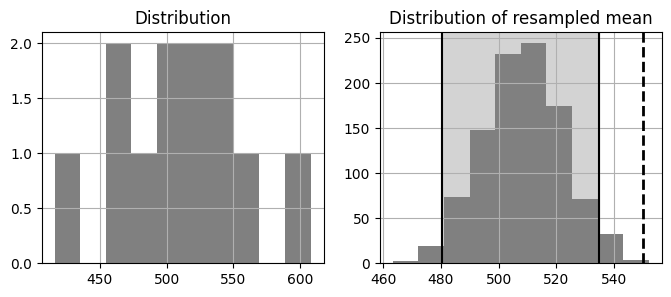

In [30]:
fig, axes = plt.subplots(figsize=[8, 3], ncols=2)
etchrate.hist(ax=axes[0], color='grey')
axes[1].axvspan(*ci, color='lightgrey') # vertical span
pd.Series(distribution).hist(ax=axes[1], color='grey')
axes[0].set_title('Distribution')
axes[1].set_title('Distribution of resampled mean')
axes[1].axvline(ci[0], color='black') # vertical line
axes[1].axvline(ci[1], color='black') # vertical line
axes[1].axvline(550, color='black', linewidth=2, linestyle='--')
plt.show()

### Examining the Bootstrap Method

### Harnessing The Bootstrap Method

## Bootstrap Testing of Hypotheses

### Bootstrap Testing and Confidence Intervals for the Mean

### Studentized Test For the Mean

In [31]:
hybrid1 = mistat.load_data('HYBRID1')

ci = pg.compute_bootci(hybrid1, func='mean', n_boot=500,
                       confidence=0.95, method='per', seed=1)
print('bootstrap: ', ci)
print()

print(stats.ttest_1samp(hybrid1, 2150))
n = len(hybrid1) - 1
t_test_confinterval = stats.t.interval(0.95, n, loc=np.mean(hybrid1),
  scale=np.std(hybrid1)/np.sqrt(n))
print('t-test 95% conf-interval', t_test_confinterval)
print()

# get distribution of bootstrapped pvalues and determine percentage of
# values less than pvalue calculated from ttest_1samp
def stat_func(x):
    return stats.ttest_1samp(x, 2150).pvalue

ci, dist = pg.compute_bootci(hybrid1, func=stat_func, n_boot=500,
                       confidence=0.95, method='per',
                       seed=1, return_dist=True)
sum(dist < stats.ttest_1samp(hybrid1, 2150).pvalue) / len(dist)

bootstrap:  [2111.68 2176.32]

TtestResult(statistic=-0.3743199001200656, pvalue=0.7107146634282755, df=31)
t-test 95% conf-interval (2107.4796487616936, 2179.3328512383064)



0.708

### Studentized Test for The Difference of Two Means

In [32]:
random.seed(1)
hybrid2 = mistat.load_data('HYBRID2')
X = hybrid2['hyb1']
Y = hybrid2['hyb2']
Xbar = np.mean(X)
Ybar = np.mean(Y)
SX = np.std(X, ddof=1)
SY = np.std(Y, ddof=1)
print(f'Xbar {Xbar:.2f} / SX {SX:.3f}')
print(f'Ybar {Ybar:.2f} / SY {SY:.3f}')

def stat_func(x, y):
    return stats.ttest_ind(x, y, equal_var=False).statistic

tstar = []
for _ in range(500):
    Xstar = np.array(random.choices(X, k=len(X))) - Xbar
    Ystar = np.array(random.choices(Y, k=len(Y))) - Ybar
    tstar.append(stat_func(Xstar, Ystar))

# calculate confidence interval for t* and D*
alpha = 0.05
tstar_ci = np.quantile(tstar, [alpha/2, 1-alpha/2])
Dstar_ci = Xbar - Ybar + np.sqrt(SX**2/len(X) + SY**2/len(Y))*tstar_ci

print('tstar-CI', tstar_ci)
print('Dstar-CI', Dstar_ci)

t0 = stat_func(X, Y)
print(f't0 {t0:.3f}')
pstar = (sum(tstar < -abs(t0)) + sum(abs(t0) < tstar)) / len(tstar)
print(f'P*-value {pstar:.2f}')

Xbar 2143.41 / SX 99.647
Ybar 1902.81 / SY 129.028
tstar-CI [-2.26597133  1.99806399]
Dstar-CI [175.28976673 298.17679872]
t0 8.348
P*-value 0.00


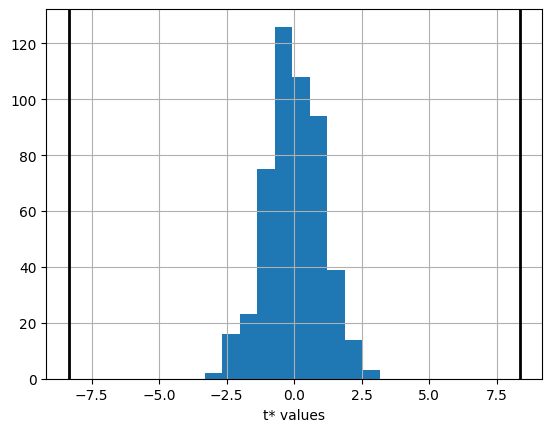

In [33]:
ax = pd.Series(tstar).hist()
ax.axvline(t0, color='black', lw=2)
ax.axvline(-t0, color='black', lw=2)
ax.set_xlabel('t* values')
plt.show()

### Bootstrap Tests and Confidence Intervals for the Variance

In [34]:
# create random sample with standard deviation 24.8
from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(seed=150)
X = stats.norm.rvs(scale=20, size=20)
S20 = np.std(X, ddof=1)
print(f'S20 = {S20:.3f}')

random.seed(1)
sigma0 = 20
GM = []
for _ in range(500):
    Xstar = random.choices(X, k=20)
    GM.append(np.std(Xstar, ddof=1)**2)

Pstar = sum(GM > (S20**2/sigma0)**2) / len(GM)
print(S20**2/sigma0)
print(f'Pstar = {Pstar:.3f}')

alpha=0.05
ci = np.quantile(GM, [alpha/2, 1-alpha/2])
print(f'0.95-ci [{ci[0]}, {ci[1]}]')

# chi2 confidence limit
n = 20
ci = (n-1)*S20**2 / stats.chi2.ppf([1-alpha/2, alpha/2], n-1)
print(f'chi2-ci [{ci[0]}, {ci[1]}]')

# bootstrapped based
GMquant = np.quantile(GM, [1-alpha/2, alpha/2])
ci = S20**4 / GMquant
print(f'boot-ci [{ci[0]}, {ci[1]}]')

S20 = 24.837
30.843882606534628
Pstar = 0.016
0.95-ci [282.1441534165316, 931.7079647027307]
chi2-ci [356.7685004417997, 1315.9662831350934]
boot-ci [408.4305942578152, 1348.7362154780665]


### Comparing Statistics of Several Samples

#### Comparing Variances of Several Samples

In [35]:
hybrid = mistat.load_data('HYBRID')

# variance for each column
S2 = hybrid.var(axis=0)
F0 = max(S2) / min(S2)
print('S2', S2)
print('F0', F0)

# Step 1: sample variances of bootstrapped samples for each column
B = {}
for seed, column in enumerate(hybrid.columns):
    B[column] = pg.compute_bootci(hybrid[column], func='var', n_boot=500,
                       confidence=0.95, seed=seed, return_dist=True)
Bt = pd.DataFrame({column: B[column][1] for column in hybrid.columns})

# Step 2: compute Wi
Wi = Bt / S2

# Step 3: compute F*
FBoot = Wi.max(axis=1) / Wi.min(axis=1)
FBoot95 = np.quantile(FBoot, 0.95)
print('FBoot 95%', FBoot95)
print('ratio', sum(FBoot >= F0)/len(FBoot))

S2 hyb1     9929.539315
hyb2    16648.350806
hyb3    21001.007056
dtype: float64
F0 2.1150031629110884
FBoot 95% 2.370310962512835
ratio 0.104


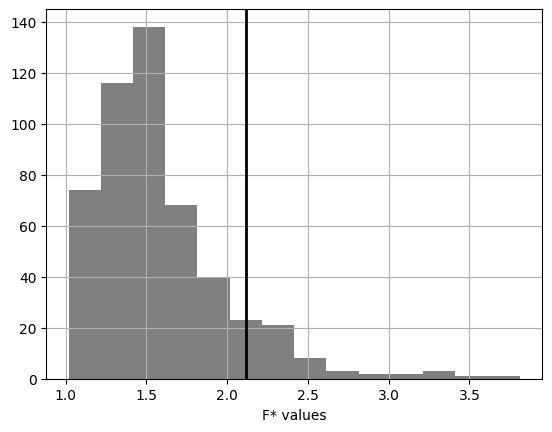

In [36]:
ax = pd.Series(FBoot).hist(bins=14, color='grey')
ax.axvline(F0, color='black', lw=2)
ax.set_xlabel('F* values')
plt.show()

#### Comparing Several Means:  The One-Way Analysis of Variance

F = 50.333


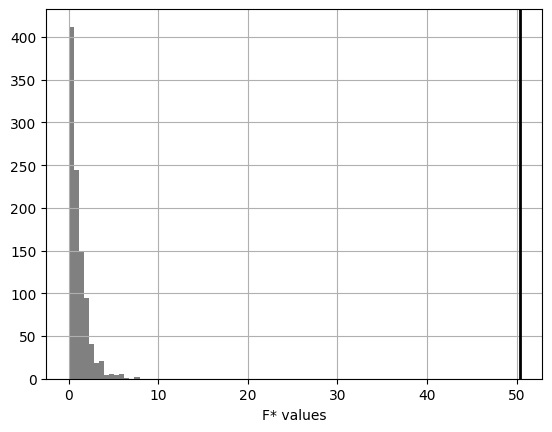

In [37]:
hybrid = mistat.load_data('HYBRID')
hybrid_long = pd.melt(hybrid, value_vars=hybrid.columns)

def test_statistic_F(samples):
    ''' Calculate test statistic F from samples '''
    k = len(samples)
    Ni = np.array([len(sample) for sample in samples])
    N = np.sum(Ni)
    XBni = np.array([np.mean(sample) for sample in samples])
    S2ni = np.array([np.var(sample, ddof=1) for sample in samples])
    XBB = np.sum(Ni * XBni) / N
    Sn = np.sum(Ni*(XBni - XBB)**2) / (k-1)
    Sd = np.sum((Ni-1)*S2ni) / (N-1)
    F0 = Sn / Sd
    return F0, XBni, XBB

samples = [hybrid['hyb1'], hybrid['hyb2'], hybrid['hyb3']]
F0, XBni, XBB = test_statistic_F(samples)
DB = XBni - XBB
print(f'F = {F0:.3f}')

Ns = 1000
Fstar = []
for _ in range(Ns):
    Ysamples  = []
    for sample, DBi in zip(samples, DB):
        Xstar = np.array(random.choices(sample, k=len(sample)))
        Ystar = Xstar - DBi
        Ysamples.append(Ystar)
    Fs = test_statistic_F(Ysamples)[0]
    Fstar.append(Fs)

ax = pd.Series(Fstar).hist(bins=14, color='grey')
ax.axvline(F0, color='black', lw=2)
ax.set_xlabel('F* values')
plt.show()

In [38]:
def test_statistic_F(samples):
    return stats.f_oneway(*samples).statistic

F0 = test_statistic_F(samples)
print(f'F = {F0:.3f}')

# Calculate sample shifts
Ni = np.array([len(sample) for sample in samples])
N = np.sum(Ni)
XBni = np.array([np.mean(sample) for sample in samples])
XBB = np.sum(Ni * XBni) / N
DB = XBni - XBB

Ns = 1000
Fstar = []
for _ in range(Ns):
    Ysamples  = []
    for sample, DBi in zip(samples, DB):
        Xstar = np.array(random.choices(sample, k=len(sample)))
        Ysamples.append(Xstar - DBi)
    Fs = test_statistic_F(Ysamples)
    Fstar.append(Fs)

F = 49.274


## Bootstrap Tolerance Intervals

### Bootstrap Tolerance Intervals For Bernoulli Samples

In [39]:
stats.binom.ppf([0.025, 0.975], 50, 0.1)

array([1., 9.])

In [40]:
oelect = mistat.load_data('OELECT')

elec_index = np.array([1 if 216 <= value <= 224 else 0
                       for value in oelect])

def qbinomBoot(x, p):
    return stats.binom.ppf(p, 100, p=x.mean())

B_025 = pg.compute_bootci(elec_index, func=lambda x: qbinomBoot(x, p=0.025),
                          n_boot=500, seed=1, return_dist=True)
B_975 = pg.compute_bootci(elec_index, func=lambda x: qbinomBoot(x, p=0.975),
                          n_boot=500, seed=1, return_dist=True)
tol_int = [np.quantile(B_025[1], 0.025),np.quantile(B_975[1], 0.975)]
print(f'Tolerance interval ({tol_int[0]}, {tol_int[1]})')


Tolerance interval (50.0, 85.0)


### Tolerance Interval for Continuous Variables

In [41]:
cyclt = mistat.load_data('CYCLT')
cyclt = [*cyclt, *cyclt]  # create a dataset of size 100 by duplication

def getQuantile(x, p):
    return np.quantile(x, p)

B_025 = pg.compute_bootci(cyclt, func=lambda x: getQuantile(x, p=0.025),
          n_boot=500, seed=1, return_dist=True)
B_975 = pg.compute_bootci(cyclt, func=lambda x: getQuantile(x, p=0.975),
          n_boot=500, seed=1, return_dist=True)
print('0.025%', np.quantile(B_025[1], 0.025))
print('0.975%', np.quantile(B_975[1], 0.975))

0.025% 0.175
0.975% 1.141


### Distribution Free Tolerance Intervals

## Nonparametric Tests

### The Sign Test

### The Randomization Test

In [42]:
from itertools import permutations

A = pd.Series([0.75, 0.60, 0.80, 1.5, 1.1, 1.8, ])
sum_groups = A.groupby(list('111222')).sum()
T1, T2 = sum_groups

assignments = []
for perm in sorted(set(permutations('111222'))):
  perm = list(perm)
  sum_groups = A.groupby(perm).sum()
  perm.append((sum_groups['2'] - sum_groups['1']) / 3)
  assignments.append(perm)
columns = list(A)
columns.append('D')
result = pd.DataFrame(assignments, columns=columns)

In [43]:
result

,0.75,0.6,0.8,1.5,1.1,1.8,D
0,1,1,1,2,2,2,0.750000
1,1,1,2,1,2,2,0.283333
2,1,1,2,2,1,2,0.550000
3,1,1,2,2,2,1,0.083333
4,1,2,1,1,2,2,0.150000
5,1,2,1,2,1,2,0.416667
6,1,2,1,2,2,1,-0.050000
7,1,2,2,1,1,2,-0.050000
8,1,2,2,1,2,1,-0.516667
9,1,2,2,2,1,1,-0.250000


In [44]:
oelect = mistat.load_data('OELECT')
oelect1 = mistat.load_data('OELECT1')

_ = mistat.randomizationTest(oelect, oelect1, np.mean,
                             aggregate_stats=lambda x: x[0] - x[1],
                             n_boot=500, seed=1)

Original stat is -10.721980
Original stat is at quantile 1 of 501 (0.20%)
Distribution of bootstrap samples:
 min: -4.94, median: 0.16,  max: 4.55


### The Wilcoxon Signed Rank Test

In [45]:
X = [0.188, 0.353, -0.257, 0.220, 0.168]
Y = [1.240, 1.821, 2.500, 2.319, 2.190]

print('Wilcoxon signed-rank test (unsuitable for ties)')
print(stats.ranksums(X, Y))
print('Mann-Whitney U test (suitable for ties)')
print(stats.mannwhitneyu(X, Y))

Wilcoxon signed-rank test (unsuitable for ties)
RanksumsResult(statistic=-2.6111648393354674, pvalue=0.009023438818080326)
Mann-Whitney U test (suitable for ties)
MannwhitneyuResult(statistic=0.0, pvalue=0.007936507936507936)


## Chapter Highlights

## Exercises